In [3]:
import pandas as pd
import seaborn as sns

# Overview of the interested independent variable Covid 19 cases

My primary interested independent variable is Covid-19 cases in 2020 in each state/county. The dataset was downloaded from New York Time public Github for Covid-19 analysis. 
The link is here:  https://github.com/nytimes/covid-19-data

In [4]:
#read the county-level data
covid_county = pd.read_csv('us-counties.csv')

In [5]:
covid_county.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [6]:
#read the state-level data
covid_state = pd.read_csv('us-states.csv')

In [7]:
covid_state.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [9]:
#check whether if it contains all counties data or not
def unique(county):
    unique_county = []
    for x in county:
        if x not in unique_county:
            unique_county.append(x)
    return unique_county
county_withdup = []
for col in covid_county.county:
    county_withdup.append(col)

In [10]:
#check whether it covers all state
state_lst = []
for state in covid_state.state:
    state_lst.append(state)
unique_state = unique(state_lst)
len(unique_state)

56

In [11]:
unique_county = unique(county_withdup)

In [12]:
len(unique_county)

1932

There are in total of 56 states in the United States, but over 3,006 counties. In other words, for the county-level data, there are missing data, I plan to stick with tieh 1,932 counties for my analysis. If I have more time, I may use machine learnnig methods to fill in the missing data. For the initial findings, I will first run the state-level data for regression analysis, then go to the county-level data. 

In [13]:
#find 2020 culumative covid-19 state level data
covid_19_2020 = covid_state.loc[covid_state['date'] == '2020-12-31']

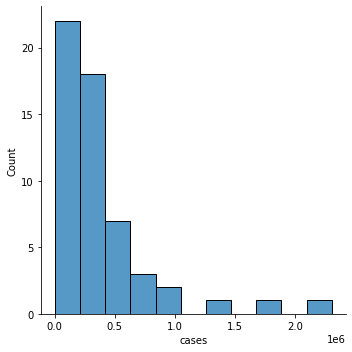

In [14]:
sns.displot(covid_19_2020, x="cases")

In [15]:
covid_19_2020.describe()

,fips,cases,deaths
count,55.000000,5.500000e+01,55.000000
mean,32.036364,3.640873e+05,6291.818182
std,18.878720,4.292937e+05,7832.436386
min,1.000000,1.220000e+02,2.000000
25%,17.500000,9.022550e+04,1318.500000
50%,31.000000,2.688280e+05,3676.000000
75%,45.500000,4.969180e+05,7167.000000
max,78.000000,2.307860e+06,37557.000000


In [16]:
covid_19_2020 = covid_19_2020.rename(columns={'state': 'State'})

In [17]:
covid_19_2020.head()

,date,State,fips,cases,deaths
16679,2020-12-31,Alabama,1,361226,4827
16680,2020-12-31,Alaska,2,46740,198
16681,2020-12-31,Arizona,4,523829,8879
16682,2020-12-31,Arkansas,5,225138,3676
16683,2020-12-31,California,6,2307860,25965


In [18]:
#drop the unnecessary data
covid_19_2020 = covid_19_2020.drop(['date'], axis = 1)
covid_19_2020 = covid_19_2020.drop(['deaths'], axis = 1)
covid_19_2020 = covid_19_2020.drop(['fips'], axis = 1)

In [19]:
#save the data to csv
covid_19_2020.to_csv("covid_19_clean.csv")

# Overview of the income, dependent variable

As I want to research on the Covid-19 impact on income, my dependent variable is income. I download the dataset from  from BEA government. The link to the dataset: https://www.bea.gov/data/income-saving/personal-income-county-metro-and-other-areas

In [259]:
#income = income.rename(columns={'County Name': 'County&State'})
#remove any null values
#income = income[income['County&State'].notna()]
#income['County&State'].isnull().sum()
#filter out the states, and only county
#income.loc[:,'only_county'] = income.loc[:,'County&State'].apply(lambda x: " ".join(x for x in x.split() if x not in state_names))
#filter out the county, and keep the state
#income.loc[:, 'only_state'] = income.loc[:,'County&State'].apply(lambda x: " ".join(x for x in x.split() if x in state_names))

In [20]:
#read state level income data
income = pd.read_csv('income_state_clean.csv')

In [21]:
income.head()

,State,2020_personal_income
0,Connecticut,"79,771"
1,Maine,"54,225"
2,Massachusetts,"79,721"
3,New Hampshire,"66,418"
4,Rhode Island,"60,837"


In [22]:
income = income[income['2020_personal_income'].notnull()]

In [23]:
#get a copy of the state names from the Internet
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", 
               "Arizona", "California", "Colorado", "Connecticut", 
               "District of Columbia", "Delaware", "Florida", 
               "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", 
               "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", 
               "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", 
               "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", 
               "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", 
               "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", 
               "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", 
               "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

In [24]:
def find_all_state(state):
    state_lst = []
    for state in state:
        state_lst.append(state)
    return state_lst

In [25]:
#There is missing data in the state income, find which state is not in the data
income_state_lst = find_all_state(income.State)
set(state_names) - set(income_state_lst)

{'American Samoa', 'Guam', 'Virgin Islands'}

# Overview of the control variable

In [26]:
controls = pd.read_csv("state_control_variable.csv")

In [27]:
controls.head()

,State,Total Population,Population below Poverty level,Percent below poverty level,Male married population,Female married population,Total married population,Married percentage,Bachelor Degree percentage,Labor Force Population,Labor Force Percentage,Hispanic population percentage,Female Population percentage,Non-hispanic white population,Non-hispanic African American population
0,Alabama,"4,771,614","762,642",16.00%,1263753,1497246,2760999,0.578630,27.8,2250343,47.16%,5.30%,51.6,65.30%,26.80%
1,Alaska,"719,445","74,369",10.30%,189194,197219,386413,0.537099,31.9,351509,48.86%,6.80%,47.9,57.50%,3.28%
2,Arizona,"7,012,999","990,528",14.10%,1813154,2060068,3873222,0.552292,33.0,3503517,49.96%,30.70%,50.3,53.40%,6.20%
3,Arkansas,"2,923,585","470,190",16.10%,810926,933180,1744106,0.596564,24.9,1332788,45.59%,8.50%,50.9,68.50%,16.50%
4,California,"38,589,882","4,853,434",12.60%,9367720,10701406,20069126,0.520062,36.9,18781662,48.67%,39.40%,50.3,34.70%,7.10%


In [28]:
control_state_lst = find_all_state(controls.State)
set(state_names) - set(control_state_lst)

{'American Samoa', 'Guam', 'Virgin Islands'}

In [29]:
covid_19_2020_lst = find_all_state(covid_19_2020.State)
set(state_names) - set(covid_19_2020_lst)

{'American Samoa'}

There are missing data in the control variables and the income, for the three states: 'American Samoa', 'Guam', 'Virgin Islands'. Bedies, there are also missing data for covid-19 cases, which is for the state American Samoa. As there are no official data for the control varaibles and income, I will delete these three states in the covid-19 cases, thus, in total I will run a regression for 52 states in the US.

In [30]:
#drop the two state in covid19 dataset
covid_19_2020.drop(covid_19_2020.loc[covid_19_2020['State']=='Guam'].index, inplace=True)
covid_19_2020.drop(covid_19_2020.loc[covid_19_2020['State']=='Virgin Islands'].index, inplace=True)
covid_19_2020.drop(covid_19_2020.loc[covid_19_2020['State']=='Northern Mariana Islands'].index, inplace=True)

In [31]:
#to make sure that control varaibles, covid-19, and income have the same amount of states for analysis
controls.State.count() == covid_19_2020.State.count() == controls.State.count()

True

In [32]:
#combine the dataset all together
regression_data = pd.merge(controls, income, on = 'State')
regression_data_final = pd.merge(regression_data, covid_19_2020, on = 'State')
#regression_data_final.loc[:, "cases"] = pd.to_numeric(regression_data_final.loc[:, "cases"])
#regression_data_final.loc[:, "Total Population"] = pd.to_numeric(regression_data_final.loc[:, "Total Population"])
#regression_data_final['Proportion of people got covid'] = regression_data_final['cases']/ regression_data_final['Total Population']
regression_data_final.head()

,State,Total Population,Population below Poverty level,Percent below poverty level,Male married population,Female married population,Total married population,Married percentage,Bachelor Degree percentage,Labor Force Population,Labor Force Percentage,Hispanic population percentage,Female Population percentage,Non-hispanic white population,Non-hispanic African American population,2020_personal_income,cases
0,Alabama,"4,771,614","762,642",16.00%,1263753,1497246,2760999,0.578630,27.8,2250343,47.16%,5.30%,51.6,65.30%,26.80%,"46,908",361226
1,Alaska,"719,445","74,369",10.30%,189194,197219,386413,0.537099,31.9,351509,48.86%,6.80%,47.9,57.50%,3.28%,"64,780",46740
2,Arizona,"7,012,999","990,528",14.10%,1813154,2060068,3873222,0.552292,33.0,3503517,49.96%,30.70%,50.3,53.40%,6.20%,"48,950",523829
3,Arkansas,"2,923,585","470,190",16.10%,810926,933180,1744106,0.596564,24.9,1332788,45.59%,8.50%,50.9,68.50%,16.50%,"47,109",225138
4,California,"38,589,882","4,853,434",12.60%,9367720,10701406,20069126,0.520062,36.9,18781662,48.67%,39.40%,50.3,34.70%,7.10%,"71,480",2307860


In [33]:
regression_data_final.to_csv("regression_data_final.csv")

In [34]:
regression = pd.read_csv("regression_data_final_ratio.csv")
regression.head()

,State,Total Population,Population below Poverty level,Percent below poverty level,Male married population,Female married population,Total married population,Married percentage,Bachelor Degree percentage,Labor Force Population,Labor Force Percentage,Hispanic population percentage,Female Population percentage,Non-hispanic white population,Non-hispanic African American population,2020_personal_income,cases,Proportion of people who got Covid-19
0,Alabama,4771614.0,"762,642",16.00%,1263753,1497246,2760999,57.86%,27.8,2250343,47.16%,5.30%,51.6,65.30%,26.80%,46908,361226,7.57%
1,Alaska,719445.0,"74,369",10.30%,189194,197219,386413,53.71%,31.9,351509,48.86%,6.80%,47.9,57.50%,3.28%,64780,46740,6.50%
2,Arizona,7012999.0,"990,528",14.10%,1813154,2060068,3873222,55.23%,33.0,3503517,49.96%,30.70%,50.3,53.40%,6.20%,48950,523829,7.47%
3,Arkansas,2923585.0,"470,190",16.10%,810926,933180,1744106,59.66%,24.9,1332788,45.59%,8.50%,50.9,68.50%,16.50%,47109,225138,7.70%
4,California,38589882.0,"4,853,434",12.60%,9367720,10701406,20069126,52.01%,36.9,18781662,48.67%,39.40%,50.3,34.70%,7.10%,71480,2307860,5.98%


In [35]:
#extract the variables that I need for anlysis
regression_analysis = regression[['State', 'Total Population', '2020_personal_income', 
                                  'Proportion of people who got Covid-19','Percent below poverty level', 'Married percentage', 
                                            'Bachelor Degree percentage', 'Labor Force Percentage',
                                            'Hispanic population percentage', 'Female Population percentage',
                                            'Non-hispanic white population', 'Non-hispanic African American population']]

In [36]:
regression_analysis.head()

,State,Total Population,2020_personal_income,Proportion of people who got Covid-19,Percent below poverty level,Married percentage,Bachelor Degree percentage,Labor Force Percentage,Hispanic population percentage,Female Population percentage,Non-hispanic white population,Non-hispanic African American population
0,Alabama,4771614.0,46908,7.57%,16.00%,57.86%,27.8,47.16%,5.30%,51.6,65.30%,26.80%
1,Alaska,719445.0,64780,6.50%,10.30%,53.71%,31.9,48.86%,6.80%,47.9,57.50%,3.28%
2,Arizona,7012999.0,48950,7.47%,14.10%,55.23%,33.0,49.96%,30.70%,50.3,53.40%,6.20%
3,Arkansas,2923585.0,47109,7.70%,16.10%,59.66%,24.9,45.59%,8.50%,50.9,68.50%,16.50%
4,California,38589882.0,71480,5.98%,12.60%,52.01%,36.9,48.67%,39.40%,50.3,34.70%,7.10%


In [37]:
regression_analysis = regression_analysis.rename(columns={'2020_personal_income': 'income', 
                                                         'Proportion of people who got Covid-19': 'covid-19',
                                                         'Percent below poverty level': 'poverty ratio',
                                                         'Married percentage': 'marriage ratio',
                                                         'Bachelor Degree percentage': 'education ratio',
                                                         'Labor Force Percentage': 'laborforce ratio',
                                                         'Hispanic population percentage': 'ethnicity ratio',
                                                         'Female Population percentage': 'gender ratio',
                                                         'Non-hispanic African American population': 'black ratio',
                                                         'Non-hispanic white population': 'white ratio'})

In [38]:
regression_analysis.head()

,State,Total Population,income,covid-19,poverty ratio,marriage ratio,education ratio,laborforce ratio,ethnicity ratio,gender ratio,white ratio,black ratio
0,Alabama,4771614.0,46908,7.57%,16.00%,57.86%,27.8,47.16%,5.30%,51.6,65.30%,26.80%
1,Alaska,719445.0,64780,6.50%,10.30%,53.71%,31.9,48.86%,6.80%,47.9,57.50%,3.28%
2,Arizona,7012999.0,48950,7.47%,14.10%,55.23%,33.0,49.96%,30.70%,50.3,53.40%,6.20%
3,Arkansas,2923585.0,47109,7.70%,16.10%,59.66%,24.9,45.59%,8.50%,50.9,68.50%,16.50%
4,California,38589882.0,71480,5.98%,12.60%,52.01%,36.9,48.67%,39.40%,50.3,34.70%,7.10%


In [39]:
#covert the data into numerical value
regression_analysis.loc[:, "income"] = pd.to_numeric(regression_analysis.loc[:, "income"])
#delete the precentage sign and convert everthing into numeric value
regression_analysis["covid-19"] = regression_analysis["covid-19"].str.replace('\%','')
regression_analysis.loc[:, "covid-19"] = pd.to_numeric(regression_analysis.loc[:, "covid-19"])

regression_analysis["poverty ratio"] = regression_analysis["poverty ratio"].str.replace('\%','')
regression_analysis.loc[:, "poverty ratio"] = pd.to_numeric(regression_analysis.loc[:, "poverty ratio"])

regression_analysis["marriage ratio"] = regression_analysis["marriage ratio"].str.replace('\%','')
regression_analysis.loc[:, "marriage ratio"] = pd.to_numeric(regression_analysis.loc[:, "marriage ratio"])

regression_analysis["laborforce ratio"] = regression_analysis["laborforce ratio"].str.replace('\%','')
regression_analysis.loc[:, "laborforce ratio"] = pd.to_numeric(regression_analysis.loc[:, "laborforce ratio"])

regression_analysis["white ratio"] = regression_analysis["white ratio"].str.replace('\%','')
regression_analysis.loc[:, "white ratio"] = pd.to_numeric(regression_analysis.loc[:, "white ratio"])

regression_analysis["ethnicity ratio"] = regression_analysis["ethnicity ratio"].str.replace('\%','')
regression_analysis.loc[:, "ethnicity ratio"] = pd.to_numeric(regression_analysis.loc[:, "ethnicity ratio"])

regression_analysis["black ratio"] = regression_analysis["black ratio"].str.replace('\%','')
regression_analysis.loc[:, "black ratio"] = pd.to_numeric(regression_analysis.loc[:, "black ratio"])

regression_analysis.loc[:, "Total Population"] = pd.to_numeric(regression_analysis.loc[:, "Total Population"])

<ipython-input-39-a29b08a818c7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  regression_analysis["covid-19"] = regression_analysis["covid-19"].str.replace('\%','')
<ipython-input-39-a29b08a818c7>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  regression_analysis["poverty ratio"] = regression_analysis["poverty ratio"].str.replace('\%','')
<ipython-input-39-a29b08a818c7>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  regression_analysis["marriage ratio"] = regression_analysis["marriage ratio"].str.replace('\%','')
<ipython-input-39-a29b08a818c7>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  regression_analysis["laborforce ratio"] = regression_analysis["laborforce ratio"].str.replace('\%','')
<ipython-input-39-a29b08a818c7>:16: FutureWarning: The default value of regex will chang

In [40]:
regression_analysis.head()

,State,Total Population,income,covid-19,poverty ratio,marriage ratio,education ratio,laborforce ratio,ethnicity ratio,gender ratio,white ratio,black ratio
0,Alabama,4771614.0,46908,7.57,16.0,57.86,27.8,47.16,5.3,51.6,65.3,26.80
1,Alaska,719445.0,64780,6.50,10.3,53.71,31.9,48.86,6.8,47.9,57.5,3.28
2,Arizona,7012999.0,48950,7.47,14.1,55.23,33.0,49.96,30.7,50.3,53.4,6.20
3,Arkansas,2923585.0,47109,7.70,16.1,59.66,24.9,45.59,8.5,50.9,68.5,16.50
4,California,38589882.0,71480,5.98,12.6,52.01,36.9,48.67,39.4,50.3,34.7,7.10


In [41]:
regression_analysis['poverty'] = regression_analysis['Total Population'] * (regression_analysis['poverty ratio']/100)
regression_analysis['cases'] = regression_analysis['Total Population'] * (regression_analysis['covid-19']/100)
regression_analysis['marriage'] = regression_analysis['Total Population'] * (regression_analysis['marriage ratio']/100)
regression_analysis['education'] = regression_analysis['Total Population'] * (regression_analysis['education ratio']/100)
regression_analysis['gender'] = regression_analysis['Total Population'] * (regression_analysis['gender ratio']/100)
regression_analysis['laborforce'] = regression_analysis['Total Population'] * (regression_analysis['laborforce ratio']/100)
regression_analysis['white'] = regression_analysis['Total Population'] * (regression_analysis['white ratio']/100)
regression_analysis['black'] = regression_analysis['Total Population'] * (regression_analysis['black ratio']/100)
regression_analysis['ethnicity'] = regression_analysis['Total Population'] * (regression_analysis['ethnicity ratio']/100)

In [47]:
#save the clean data into a regression analysis dataset
regression_analysis.to_csv("regression_analysis.csv")

In [42]:
regression_map = regression_analysis[['income', 'poverty ratio', 'covid-19', 'marriage ratio',
                                     'education ratio', 'gender ratio', 'laborforce ratio', 
                                     'white ratio', 'black ratio', 'ethnicity ratio']]

<AxesSubplot:>

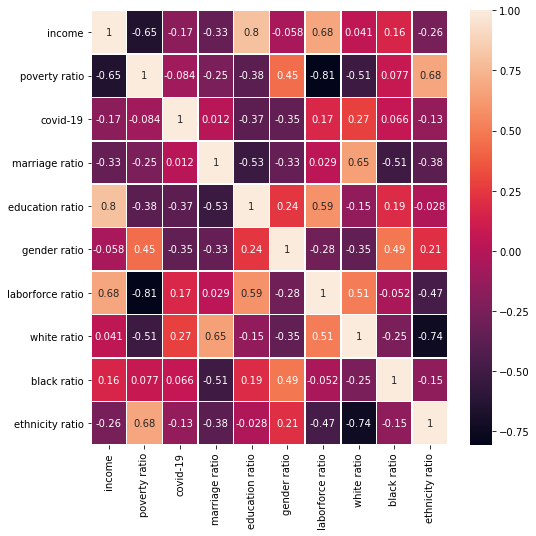

In [43]:
#check the multicollenarity issue in the regression
import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
sn.heatmap(regression_map.corr(), annot=True, linewidths=.5, ax=ax)

# Mutivariate Regression Analysis

In adding the control variables, I add them one by one to see whether adding more variables will increase my model R squared or not. In my control variables, when adding marriage, it does not increase the r squared, so I did not put marriage as my control varaible here.

In [44]:
import statsmodels.api as sm
covid_19_x = regression_analysis['cases']
y = regression_analysis['income']
covid_data = sm.add_constant(covid_19_x)
model_covid = sm.OLS(y, covid_data).fit()
summary_covid = model_covid.summary()
print(summary_covid)

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8706
Date:                Mon, 25 Apr 2022   Prob (F-statistic):              0.355
Time:                        11:26:37   Log-Likelihood:                -556.57
No. Observations:                  52   AIC:                             1117.
Df Residuals:                      50   BIC:                             1121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.586e+04   2047.543     27.281      0.0

In [45]:
#regression.loc[:, "cases"] = pd.to_numeric(regression.loc[:, "cases"])
#regression.loc[:, "2020_personal_income"] = pd.to_numeric(regression.loc[:, "2020_personal_income"])
X = regression_analysis[['cases', 'poverty', 'education', 'gender', 'white', 'black', 'ethnicity', 
                         'laborforce']]
y = regression_analysis['income']
data = sm.add_constant(X)
model = sm.OLS(y, data).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     12.32
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           5.80e-09
Time:                        11:26:41   Log-Likelihood:                -526.04
No. Observations:                  52   AIC:                             1070.
Df Residuals:                      43   BIC:                             1088.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.719e+04   1575.112     36.310      0.0